In [41]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')
df


C:\Users\camil\AppData\Local\Temp\ipykernel_17292\296774311.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')


,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,,,,,,,,,,,,,,,,,,,,,
22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN


In [15]:
df2 = pd.read_csv ('games.csv', index_col=0, delimiter=',', encoding='latin-1')
df2 = df2.get(['SEASON','GAME_ID'])
df = df.merge(df2, how= 'right', on='GAME_ID')
df.head()
#df1 = df[['GAME_DATE_EST']]
#df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22100213,1.610613e+09,WAS,Washington,203484.0,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,2021
1,22100213,1.610613e+09,WAS,Washington,1628398.0,Kyle Kuzma,Kyle,F,NaN,30:28,...,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0,2021
2,22100213,1.610613e+09,WAS,Washington,1629655.0,Daniel Gafford,Daniel,C,NaN,24:21,...,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0,2021
3,22100213,1.610613e+09,WAS,Washington,203078.0,Bradley Beal,Bradley,G,NaN,35:07,...,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0,2021
4,22100213,1.610613e+09,WAS,Washington,203915.0,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0,2021


In [38]:
dff = df.groupby(["START_POSITION","SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff["FG3_%"] = dff["FG3M_"].div(dff["FG3A_"].values)
dff=dff.loc[dff['START_POSITION'] == 'C']
dff=dff.loc[dff['SEASON'] < 2020]
dff

,START_POSITION,SEASON,FG3M_,FG3A_,FG3_%
0,C,2003,139.0,432.0,0.321759
1,C,2004,110.0,367.0,0.299728
2,C,2005,113.0,354.0,0.319209
3,C,2006,245.0,730.0,0.335616
4,C,2007,472.0,1359.0,0.347314
5,C,2008,446.0,1168.0,0.381849
6,C,2009,388.0,1089.0,0.356290
7,C,2010,138.0,426.0,0.323944
8,C,2011,99.0,326.0,0.303681
9,C,2012,94.0,340.0,0.276471


Text(0.5, 0, 'SEASON')

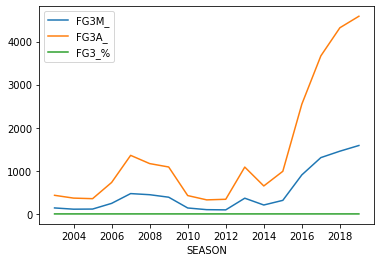

In [51]:
dff.plot(kind='line',x='SEASON')
plt.xlabel('SEASON')
